In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [32]:
df = pd.read_csv('imdb.csv') 

print(df.head())



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [33]:
le = LabelEncoder()
if df['sentiment'].dtype == 'object':
    df['sentiment'] = le.fit_transform(df['sentiment'])

vocab_size = 10000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')



In [34]:
X = padded_sequences
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [35]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [37]:
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.2, verbose=1)



Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5662 - loss: 0.6693 - val_accuracy: 0.7911 - val_loss: 0.4383
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8407 - loss: 0.3637 - val_accuracy: 0.8650 - val_loss: 0.3108
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9282 - loss: 0.2030 - val_accuracy: 0.8761 - val_loss: 0.2911
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9681 - loss: 0.1176 - val_accuracy: 0.8654 - val_loss: 0.3262
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9899 - loss: 0.0568 - val_accuracy: 0.8696 - val_loss: 0.3335


In [38]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")



469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8681 - loss: 0.3467
Test Accuracy: 0.8711


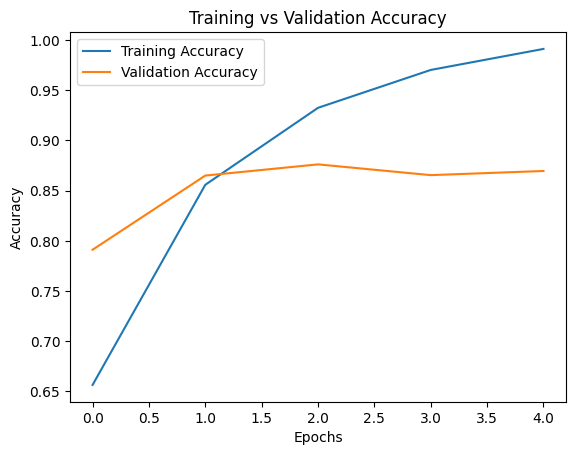

In [39]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:

              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      7411
    Positive       0.88      0.86      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



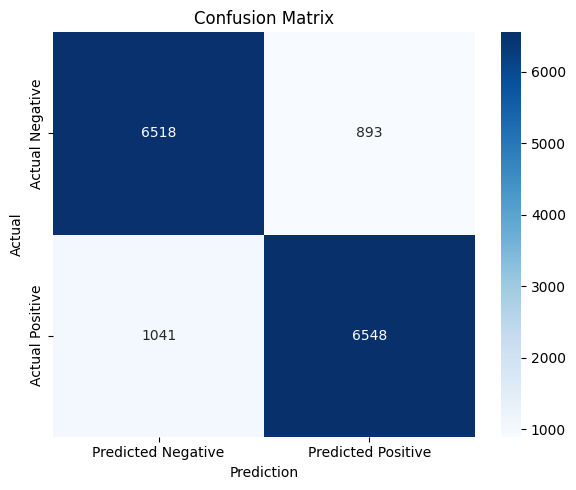

In [40]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:
Metric	Explanation
Precision	Out of all predicted positives, how many were actually positive?
Recall	Out of all actual positives, how many did the model correctly identify?
F1-score	Harmonic mean of precision and recall (balances both).
Support	Actual number of samples of each class in the test data.



1. Negative Class (0)
Precision = 0.86
→ 86% of the reviews predicted as "Negative" were actually negative.

Recall = 0.88
→ The model correctly identified 88% of all actual negative reviews.

F1-score = 0.87
→ Good balance between precision and recall for the negative class.

Support = 7411
→ There were 7411 actual negative samples in the test set.

2. Positive Class (1)
Precision = 0.88
→ 88% of the reviews predicted as "Positive" were actually positive.

Recall = 0.86
→ The model correctly identified 86% of all actual positive reviews.

F1-score = 0.87
→ Balanced and similar performance to the negative class.

Support = 7589
→ There were 7589 actual positive samples in the test set.

🧮 Overall Metrics
Accuracy = 0.87
→ Out of all 15,000 reviews, the model got 87% correct.

Macro Avg = 0.87
→ Average of precision, recall, and F1-score across both classes, treating both equally.

Weighted Avg = 0.87
→ Similar to macro avg, but takes class support (size) into account.